In [1]:
import numpy as np
import os
import face_recognition
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Helper Function
def ensure_dir(file_path):
    if not os.path.exists(file_path):
        os.makedirs(file_path)
        
def load_known_faces(known_images_folder):
    known_face_encodings = {}
    for filename in os.listdir(known_images_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(known_images_folder, filename)
            image = face_recognition.load_image_file(image_path)
            face_encodings = face_recognition.face_encodings(image)
            if face_encodings:  
                known_face_encodings[filename.split('.')[0]] = face_encodings[0]
    return known_face_encodings

def find_match(known_faces, face_encoding, threshold=0.6):
    min_dist = float('inf')
    best_match = "Unknown"
    for name, known_encoding in known_faces.items():
        dist = np.linalg.norm(face_encoding - known_encoding)
        if dist < min_dist:
            min_dist = dist
            best_match = name if dist < threshold else "Unknown"
    return best_match

In [3]:
def detect_and_display(input_image_path, threshold=0.6):
    known_faces = load_known_faces('known_faces')

    input_image = face_recognition.load_image_file(input_image_path)
    face_locations = face_recognition.face_locations(input_image)
    face_encodings = face_recognition.face_encodings(input_image, face_locations)

    for face_encoding, (top, right, bottom, left) in zip(face_encodings, face_locations):
        name = find_match(known_faces, face_encoding, threshold=threshold)
        print(f"Detected Face: {'Matched' if name != 'Unknown' else 'Unknown'}")

        face_image = input_image[top:bottom, left:right]

        if name != "Unknown":
            known_face_path = None
            for ext in ['.jpg', '.png']:
                if os.path.exists(f'known_faces/{name}{ext}'):
                    known_face_path = f'known_faces/{name}{ext}'
                    break

            if known_face_path:
                known_face_image = Image.open(known_face_path)
                plt.subplot(1, 2, 1)
                plt.imshow(face_image)
                plt.title('Detected Face')
                plt.subplot(1, 2, 2)
                plt.imshow(known_face_image)
                plt.title(f'Matched Face: {name}')
            else:
                plt.imshow(face_image)
                plt.title('No Known Face Image Found')
        else:
            plt.imshow(face_image)
            plt.title('Unknown Face')

        plt.show()

Detected Face: Matched


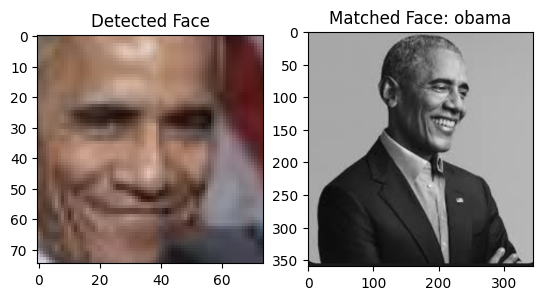

In [4]:
detect_and_display('test_images/obama.png', threshold=0.6)

Detected Face: Matched


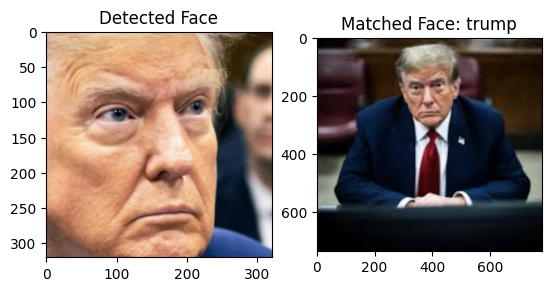

Detected Face: Unknown


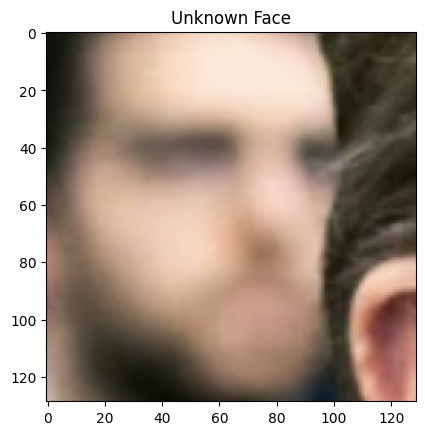

Detected Face: Unknown


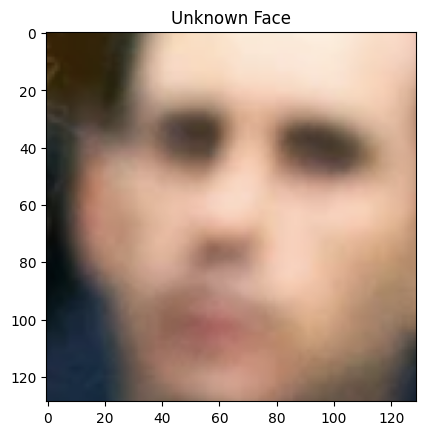

In [5]:
detect_and_display('test_images/trump.png', threshold=0.6)